In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CC18

In [2]:
df_cc18 = pd.read_csv("../data/final_results/CC18_concat.csv")
df_cc18.drop(columns="Unnamed: 0", inplace=True)
df_cc18.shape

(19992, 8)

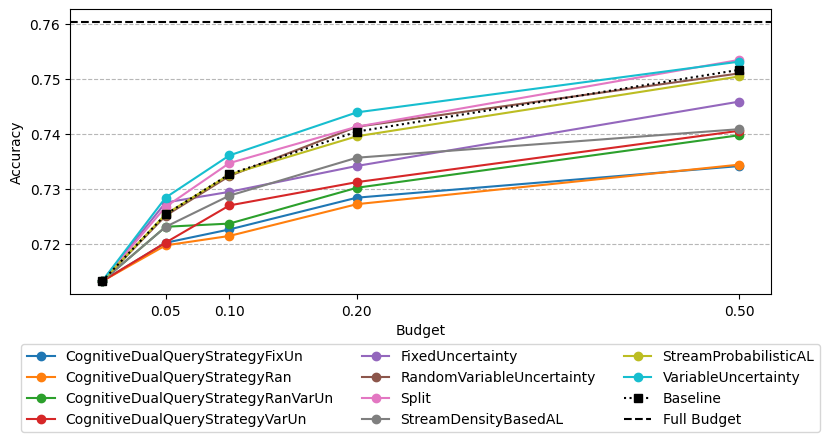

In [3]:
df_cc18_general = (
    df_cc18[["query_strategy", "budget", "initial_score", "final_accuracy"]]
    .groupby(["query_strategy", "budget"], as_index=False)
    .mean()
)

strategies_to_merge = ["PeriodicSampling", "StreamRandomSampling"]

df_baseline = df_cc18_general[
    df_cc18_general["query_strategy"].isin(strategies_to_merge)
]

df_baseline = df_baseline.groupby("budget", as_index=False).agg(
    {"initial_score": "mean", "final_accuracy": "mean"}
)

df_baseline["query_strategy"] = "Baseline"

# Concatenate the new Baseline strategy back to the original dataframe
df_new = pd.concat([df_cc18_general, df_baseline], ignore_index=True)

plt.figure(figsize=(8, 5))

for strategy in df_new["query_strategy"].unique():
    if strategy not in ["NONE: BUDGET = 1", "PeriodicSampling", "StreamRandomSampling"]:
        data = df_new[df_new["query_strategy"] == strategy]

        budget_0_dict = {
            "query_strategy": strategy,
            "budget": 0,
            "initial_score": [data["initial_score"].mean()],
            "final_accuracy": [data["initial_score"].mean()],
        }
        budget_0_df = pd.DataFrame(budget_0_dict)
        data = pd.concat([data, budget_0_df], axis=0).sort_values(
            by="budget", ascending=True
        )

        x = data["budget"]
        y = data["final_accuracy"]

        if strategy == "Baseline":
            plt.plot(x, y, label=strategy, marker="s", linestyle=":", color="black")
        else:
            plt.plot(x, y, label=strategy, marker="o")
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
        plt.xlabel("Budget")
        plt.ylabel("Accuracy")
        plt.xticks([0.05, 0.1, 0.2, 0.5])
        plt.grid(axis="y", linestyle="--", alpha=0.9)
        plt.tight_layout()

constant_value = df_new[df_new["query_strategy"] == "NONE: BUDGET = 1"][
    "final_accuracy"
].values[0]

plt.axhline(y=constant_value, color="black", linestyle="--", label="Full Budget")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

In [4]:
df_new

,query_strategy,budget,initial_score,final_accuracy
0,CognitiveDualQueryStrategyFixUn,0.05,0.713235,0.720252
1,CognitiveDualQueryStrategyFixUn,0.10,0.713235,0.722668
2,CognitiveDualQueryStrategyFixUn,0.20,0.713235,0.728435
3,CognitiveDualQueryStrategyFixUn,0.50,0.713235,0.734173
4,CognitiveDualQueryStrategyRan,0.05,0.713235,0.719781
5,CognitiveDualQueryStrategyRan,0.10,0.713235,0.721489
6,CognitiveDualQueryStrategyRan,0.20,0.713235,0.727255
7,CognitiveDualQueryStrategyRan,0.50,0.713235,0.734429
8,CognitiveDualQueryStrategyRanVarUn,0.05,0.713235,0.723153
9,CognitiveDualQueryStrategyRanVarUn,0.10,0.713235,0.723732


# Synth MOA

In [5]:
df_synth_moa = pd.read_csv("../data/final_results/synth_moa_concat.csv")
df_synth_moa.drop(columns="Unnamed: 0", inplace=True)
df_synth_moa.shape

(2940, 8)

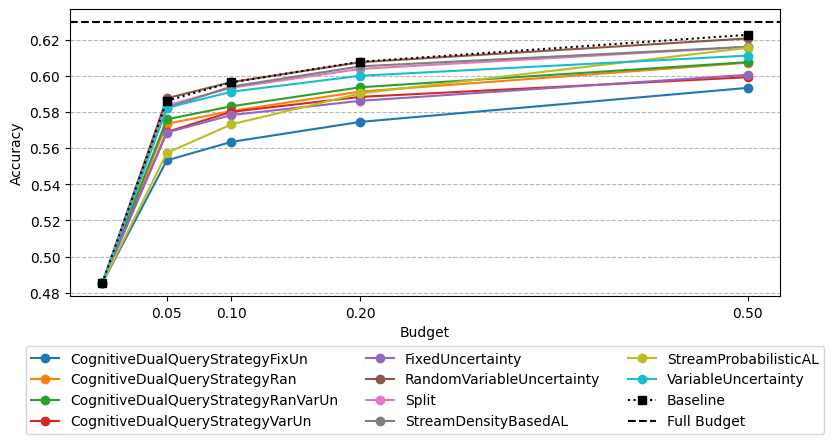

In [6]:
df_synth_moa_general = (
    df_synth_moa[["query_strategy", "budget", "initial_score", "final_accuracy"]]
    .groupby(["query_strategy", "budget"], as_index=False)
    .mean()
)

strategies_to_merge = ["PeriodicSampling", "StreamRandomSampling"]

df_baseline = df_synth_moa_general[
    df_synth_moa_general["query_strategy"].isin(strategies_to_merge)
]

df_baseline = df_baseline.groupby("budget", as_index=False).agg(
    {"initial_score": "mean", "final_accuracy": "mean"}
)

df_baseline["query_strategy"] = "Baseline"

# Concatenate the new Baseline strategy back to the original dataframe
df_new = pd.concat([df_synth_moa_general, df_baseline], ignore_index=True)

plt.figure(figsize=(8, 5))

for strategy in df_new["query_strategy"].unique():
    if strategy not in ["NONE: BUDGET = 1", "PeriodicSampling", "StreamRandomSampling"]:
        data = df_new[df_new["query_strategy"] == strategy]

        budget_0_dict = {
            "query_strategy": strategy,
            "budget": 0,
            "initial_score": [data["initial_score"].mean()],
            "final_accuracy": [data["initial_score"].mean()],
        }
        budget_0_df = pd.DataFrame(budget_0_dict)
        data = pd.concat([data, budget_0_df], axis=0).sort_values(
            by="budget", ascending=True
        )

        x = data["budget"]
        y = data["final_accuracy"]

        if strategy == "Baseline":
            plt.plot(x, y, label=strategy, marker="s", linestyle=":", color="black")
        else:
            plt.plot(x, y, label=strategy, marker="o")
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
        plt.xlabel("Budget")
        plt.ylabel("Accuracy")
        plt.xticks([0.05, 0.1, 0.2, 0.5])
        plt.grid(axis="y", linestyle="--", alpha=0.9)
        plt.tight_layout()

constant_value = df_new[df_new["query_strategy"] == "NONE: BUDGET = 1"][
    "final_accuracy"
].values[0]

plt.axhline(y=constant_value, color="black", linestyle="--", label="Full Budget")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

# Real MOA

In [7]:
df_real_moa = pd.read_csv("../data/final_results/real_moa_concat.csv")
df_real_moa.drop(columns="Unnamed: 0", inplace=True)
df_real_moa.shape

(1176, 8)

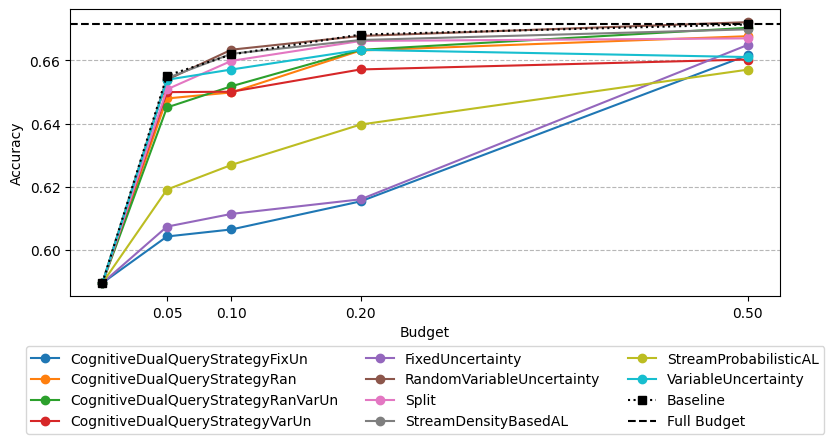

In [8]:
df_real_moa_general = (
    df_real_moa[["query_strategy", "budget", "initial_score", "final_accuracy"]]
    .groupby(["query_strategy", "budget"], as_index=False)
    .mean()
)

strategies_to_merge = ["PeriodicSampling", "StreamRandomSampling"]

df_baseline = df_real_moa_general[
    df_real_moa_general["query_strategy"].isin(strategies_to_merge)
]

df_baseline = df_baseline.groupby("budget", as_index=False).agg(
    {"initial_score": "mean", "final_accuracy": "mean"}
)

df_baseline["query_strategy"] = "Baseline"

# Concatenate the new Baseline strategy back to the original dataframe
df_new = pd.concat([df_real_moa_general, df_baseline], ignore_index=True)

plt.figure(figsize=(8, 5))

for strategy in df_new["query_strategy"].unique():
    if strategy not in ["NONE: BUDGET = 1", "PeriodicSampling", "StreamRandomSampling"]:
        data = df_new[df_new["query_strategy"] == strategy]

        budget_0_dict = {
            "query_strategy": strategy,
            "budget": 0,
            "initial_score": [data["initial_score"].mean()],
            "final_accuracy": [data["initial_score"].mean()],
        }
        budget_0_df = pd.DataFrame(budget_0_dict)
        data = pd.concat([data, budget_0_df], axis=0).sort_values(
            by="budget", ascending=True
        )

        x = data["budget"]
        y = data["final_accuracy"]

        if strategy == "Baseline":
            plt.plot(x, y, label=strategy, marker="s", linestyle=":", color="black")
        else:
            plt.plot(x, y, label=strategy, marker="o")
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
        plt.xlabel("Budget")
        plt.ylabel("Accuracy")
        plt.xticks([0.05, 0.1, 0.2, 0.5])
        plt.grid(axis="y", linestyle="--", alpha=0.9)
        plt.tight_layout()

constant_value = df_new[df_new["query_strategy"] == "NONE: BUDGET = 1"][
    "final_accuracy"
].values[0]

plt.axhline(y=constant_value, color="black", linestyle="--", label="Full Budget")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()